In [88]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [89]:
train=pd.read_csv("train.csv")

In [90]:
train

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,0,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,1,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,1,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [91]:
labels=train['labels'].values

In [92]:
test=pd.read_csv('test.csv')
test

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2246,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,2247,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,2248,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,2249,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


# Pre-Processing 

In [93]:
labels

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
train.drop('labels',axis=1,inplace=True)

In [95]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)


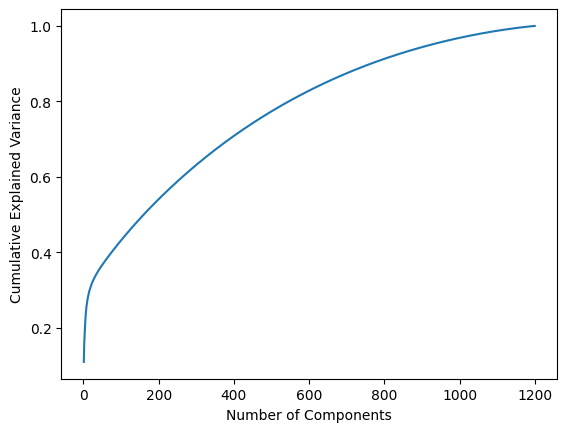

In [96]:
pca = PCA()
pca.fit(train_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [97]:
pca=PCA(n_components=900)
pca.fit(train_scaled)
train_scaled_pca=pca.transform(train_scaled)

In [98]:
test.drop('id',axis=1,inplace=True)

In [99]:
test_scaled=scaler.transform(test)

In [100]:
test_scaled_pca=pca.transform(test_scaled)

In [101]:
len(train_scaled_pca)

5250

In [102]:
len(labels)

5250

In [103]:
train_scaled_pca.shape

(5250, 900)

# Neural Network Model

In [104]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [105]:
model=Sequential()

In [106]:
model.add(Dense(256,activation='relu',input_shape=(900,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [107]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [108]:
history=model.fit(
      x=train_scaled_pca
    , y=labels
    , validation_split=0.1
    , batch_size=10
    , epochs=20
    , verbose=2
)

Epoch 1/20
473/473 - 4s - loss: 0.4719 - accuracy: 0.7752 - val_loss: 0.1344 - val_accuracy: 0.9562 - 4s/epoch - 9ms/step
Epoch 2/20
473/473 - 2s - loss: 0.2741 - accuracy: 0.8872 - val_loss: 0.0912 - val_accuracy: 0.9676 - 2s/epoch - 4ms/step
Epoch 3/20
473/473 - 2s - loss: 0.1368 - accuracy: 0.9670 - val_loss: 0.0894 - val_accuracy: 0.9752 - 2s/epoch - 4ms/step
Epoch 4/20
473/473 - 2s - loss: 0.0516 - accuracy: 0.9943 - val_loss: 0.1065 - val_accuracy: 0.9771 - 2s/epoch - 4ms/step
Epoch 5/20
473/473 - 2s - loss: 0.0158 - accuracy: 0.9996 - val_loss: 0.1350 - val_accuracy: 0.9733 - 2s/epoch - 4ms/step
Epoch 6/20
473/473 - 2s - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.1535 - val_accuracy: 0.9752 - 2s/epoch - 5ms/step
Epoch 7/20
473/473 - 2s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1674 - val_accuracy: 0.9752 - 2s/epoch - 4ms/step
Epoch 8/20
473/473 - 2s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1800 - val_accuracy: 0.9752 - 2s/epoch - 4ms/step
Epoch 9/20
473/473 - 2s 

In [109]:
type(train_scaled_pca)

numpy.ndarray

In [110]:
type(labels)

numpy.ndarray

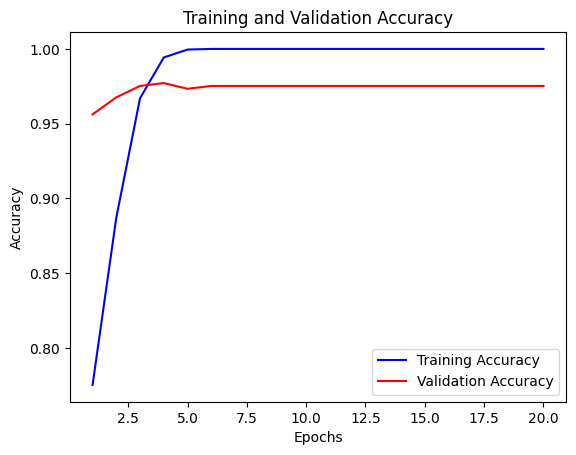

In [111]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [112]:
predicted_labels=model.predict(train_scaled_pca)
predicted_labels=np.round(predicted_labels).astype(int)
predicted_labels=np.squeeze(predicted_labels)
accuracy = accuracy_score(labels, predicted_labels)

print("Accuracy:", accuracy)

165/165 [==============================] - 0s 2ms/step
Accuracy: 0.9975238095238095


In [113]:
f1=f1_score(labels,predicted_labels)
f1

0.9953554841014649

In [114]:
prediction=model.predict(test_scaled_pca)

71/71 [==============================] - 0s 2ms/step


In [115]:
prediction=np.round(prediction).astype(int)
prediction = np.squeeze(prediction)

In [116]:
id=[]
for i in range(1,len(prediction)+1):
    id.append(i)
    
id=np.array(id)

In [117]:
prediction.shape

(2250,)

In [118]:
df=pd.DataFrame({'id': id, 'labels': prediction})

In [119]:
df

,id,labels
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [120]:
file_name="ANN_Predictions.xlsx"

In [121]:
df.to_excel(file_name, index=False)

# Logistic Regressor Model

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [123]:
X_train, X_val, y_train, y_val = train_test_split(train_scaled_pca,labels,test_size=0.1, random_state=42) 

In [124]:
C_values = np.logspace(-3, 3, num=7)

In [125]:
C_list = []
val_acc_list = []

In [126]:
for C in C_values:
    model = LogisticRegression(C=C,penalty='l2',solver='liblinear')
    model.fit(X_train,y_train)
    
    val_prediction = model.predict(X_val)
    validation_accuracy = accuracy_score(y_val,val_prediction)
    
    C_list.append(C)
    val_acc_list.append(validation_accuracy)

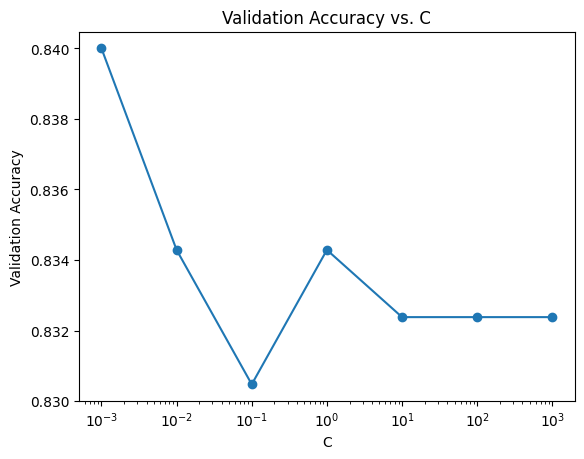

In [127]:
plt.plot(C_list, val_acc_list, marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. C')
plt.show()

In [128]:
predicted_labels=model.predict(train_scaled_pca)
predicted_labels=np.round(predicted_labels).astype(int)
predicted_labels=np.squeeze(predicted_labels)
accuracy = accuracy_score(labels, predicted_labels)

print("Accuracy:", accuracy)

Accuracy: 0.9219047619047619


In [129]:
f1=f1_score(labels,predicted_labels)
f1

0.8483727810650887

In [130]:
prediction=model.predict(test_scaled_pca)

In [131]:
prediction=np.round(prediction).astype(int)
prediction = np.squeeze(prediction)

In [132]:
id=[]
for i in range(1,len(prediction)+1):
    id.append(i)
    
id=np.array(id)

In [133]:
df=pd.DataFrame({'id': id, 'labels': prediction})
df

,id,labels
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [134]:
file_name= "Logistic_Regression_Prediction.xlsx"

In [135]:
df.to_excel(file_name,index=False)